<a href="https://colab.research.google.com/github/AgdaBeatriz4/HumanActivityRecognition/blob/main/HAR_v1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importações
import pandas as pd

import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import itertools

In [ ]:
# mapa de cores personalizado utilizado para alguns gráficos
custom_cmap = matplotlib.colors.ListedColormap(["#94d2bdff", "#72c3b4ff", "#4fb3aaff", "#2da3a0ff", "#0a9396ff", "#057985ff", "#005f73ff", "#004f5fff", "#003f4bff", "#002932ff"])

pallete: https://coolors.co/94d2bd-72c3b4-4fb3aa-2da3a0-0a9396-057985-005f73-004f5f-003f4b-002932

In [ ]:
#funções utilizadas
def removePositions():
  global positions, positionsLabelsHistoric

  # subtrair arrays
  for a in positionsLabelsHistoric: 
    if a in positions: 
      positions.remove(a)

def addPositions():
  for a in positionsLabelsHistoric: 
    if a in positions: 
      positions.append(a)

def NewPositionSameLabel():
  global positions, positionsLabelsHistoric
  
  # transformando as posições da label que estao em tupla para lista
  positions = positionsCurrentCopyYTest[0].tolist()

  # subtrair arrays
  removePositions()

def newPredictionNewLabel():
  global newYtest, lock, formerLabel, labels, currentRandomLabel, positionsCurrentCopyYTest, positions, newPositionLabel, positionsLabelsHistoric, formerPrediction, currentPrediction, FP, TN

  positionsCurrentCopyYTest = np.where(copyY_test == currentRandomLabel)

  positions = positionsCurrentCopyYTest[0].tolist()

  addPositions()

  newPositionLabel = random.choice(positions)

  formerPrediction = currentPrediction

  currentPrediction = knn.predict(copyX_test[newPositionLabel].reshape(1, -1))
  if currentPrediction == formerPrediction:
    FP = FP + 1
    trues.append(formerPrediction[0])
    predictions.append(currentPrediction[0])
    newYtest.append(1)
  else:
    TN = TN + 1
    trues.append(formerPrediction[0])
    predictions.append(currentPrediction[0])
    newYtest.append(1)
    
  labels.append(formerLabel)

def RFnewPredictionNewLabel():
  global newYtest, lock, formerLabel, labels, currentRandomLabel, positionsCurrentCopyYTest, positions, newPositionLabel, positionsLabelsHistoric, formerPrediction, currentPrediction, FP, TN

  positionsCurrentCopyYTest = np.where(copyY_test == currentRandomLabel)

  positions = positionsCurrentCopyYTest[0].tolist()

  addPositions()

  newPositionLabel = random.choice(positions)

  formerPrediction = currentPrediction

  currentPrediction = Rf.predict(copyX_test[newPositionLabel].reshape(1, -1))
  if currentPrediction == formerPrediction:
    FP = FP + 1
    trues.append(formerPrediction[0])
    predictions.append(currentPrediction[0])
    newYtest.append(1)
  else:
    TN = TN + 1
    trues.append(formerPrediction[0])
    predictions.append(currentPrediction[0])
    newYtest.append(1)
    
  labels.append(formerLabel)

def newPredictionSameLabel():
  global newYtest, lock, formerLabel, labels, currentRandomLabel, positionsCurrentCopyYTest, positions, newPositionLabel, positionsLabelsHistoric, formerPrediction, currentPrediction, TP, FN

  positionsCurrentCopyYTest = np.where(copyY_test == currentRandomLabel)

  positions = positionsCurrentCopyYTest[0].tolist()

  addPositions()

  newPositionLabel = random.choice(positions)

  formerPrediction = currentPrediction

  currentPrediction = knn.predict(copyX_test[newPositionLabel].reshape(1, -1))
  if currentPrediction == formerPrediction:
    TP = TP + 1
    trues.append(formerPrediction[0])
    predictions.append(currentPrediction[0])
    newYtest.append(0)
  else:
    FN = FN + 1
    trues.append(formerPrediction[0])
    predictions.append(currentPrediction[0])
    newYtest.append(0)

def RFnewPredictionSameLabel():
  global newYtest, lock, formerLabel, labels, currentRandomLabel, positionsCurrentCopyYTest, positions, newPositionLabel, positionsLabelsHistoric, formerPrediction, currentPrediction, TP, FN

  positionsCurrentCopyYTest = np.where(copyY_test == currentRandomLabel)

  positions = positionsCurrentCopyYTest[0].tolist()

  addPositions()

  newPositionLabel = random.choice(positions)

  formerPrediction = currentPrediction

  currentPrediction = Rf.predict(copyX_test[newPositionLabel].reshape(1, -1))
  if currentPrediction == formerPrediction:
    TP = TP + 1
    trues.append(formerPrediction[0])
    predictions.append(currentPrediction[0])
    newYtest.append(0)
  else:
    FN = FN + 1
    trues.append(formerPrediction[0])
    predictions.append(currentPrediction[0])
    newYtest.append(0)

def uniqueLabel():
  global positionsCurrentCopyYTest, positions, positionsLabelsHistoric, newPositionLabel, formerPrediction, currentPrediction, FP, TN, TP, FN
  
  positionsCurrentCopyYTest = np.where(copyY_test == labels[0])

  positions = positionsCurrentCopyYTest[0].tolist()

  # subtrair arrays
  removePositions()

  newPositionLabel = random.choice(positions)
  positionsLabelsHistoric.append(newPositionLabel)

  formerPrediction = currentPrediction

  currentPrediction = knn.predict(copyX_test[newPositionLabel].reshape(1, -1))
  if currentPrediction == formerPrediction:
    FP = FP + 1
    trues.append(formerPrediction[0])
    predictions.append(currentPrediction[0])
  else:
    TN = TN + 1
    trues.append(formerPrediction[0])
    predictions.append(currentPrediction[0])


  for positionLabel in positions:
    formerPrediction = currentPrediction

    currentPrediction = knn.predict(copyX_test[positionLabel].reshape(1, -1))
    if currentPrediction == formerPrediction:
      TP = TP + 1
      trues.append(formerPrediction[0])
      predictions.append(currentPrediction[0])
    else:
      FN = FN + 1
      trues.append(formerPrediction[0])
      predictions.append(currentPrediction[0])

def RFuniqueLabel():
  global positionsCurrentCopyYTest, positions, positionsLabelsHistoric, newPositionLabel, formerPrediction, currentPrediction, FP, TN, TP, FN
  
  positionsCurrentCopyYTest = np.where(copyY_test == labels[0])

  positions = positionsCurrentCopyYTest[0].tolist()

  # subtrair arrays
  removePositions()

  newPositionLabel = random.choice(positions)
  positionsLabelsHistoric.append(newPositionLabel)

  formerPrediction = currentPrediction

  currentPrediction = Rf.predict(copyX_test[newPositionLabel].reshape(1, -1))
  if currentPrediction == formerPrediction:
    FP = FP + 1
    trues.append(formerPrediction[0])
    predictions.append(currentPrediction[0])
  else:
    TN = TN + 1
    trues.append(formerPrediction[0])
    predictions.append(currentPrediction[0])


  for positionLabel in positions:
    formerPrediction = currentPrediction

    currentPrediction = Rf.predict(copyX_test[positionLabel].reshape(1, -1))
    if currentPrediction == formerPrediction:
      TP = TP + 1
      trues.append(formerPrediction[0])
      predictions.append(currentPrediction[0])
    else:
      FN = FN + 1
      trues.append(formerPrediction[0])
      predictions.append(currentPrediction[0])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=custom_cmap):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# obtendo os parametros para multi-classe
def perf_measure(y_actual, y_hat):
    class_id = set(y_actual).union(set(y_pred))
    TP = []
    FP = []
    TN = []
    FN = []

    for index ,_id in enumerate(class_id):
        TP.append(0)
        FP.append(0)
        TN.append(0)
        FN.append(0)
        for i in range(len(y_pred)):
            if y_actual[i] == y_pred[i] == _id:
                TP[index] += 1
            if y_pred[i] == _id and y_actual[i] != y_pred[i]:
                FP[index] += 1
            if y_actual[i] == y_pred[i] != _id:
                TN[index] += 1
            if y_pred[i] != _id and y_actual[i] != y_pred[i]:
                FN[index] += 1


    return class_id,TP, FP, TN, FN

In [ ]:
# dataframe
df = pd.read_csv("https://raw.githubusercontent.com/zhangzhao156/Human-Activity-Recognition-Codes-Datasets/master/data/SanitationDataset/sanitation.csv")

In [ ]:
df

,x,y,z,label,seg,suspicious
0,20,781,-507,walk,walk/863137003295439_walk_L_2017-07-25 17-39-0...,False
1,40,797,-492,walk,walk/863137003295439_walk_L_2017-07-25 17-39-0...,False
2,59,807,-502,walk,walk/863137003295439_walk_L_2017-07-25 17-39-0...,False
3,75,807,-527,walk,walk/863137003295439_walk_L_2017-07-25 17-39-0...,False
4,107,806,-560,walk,walk/863137003295439_walk_L_2017-07-25 17-39-0...,False
...,...,...,...,...,...,...
266550,-941,174,337,clean,clean/庆喜/repeat_82-duration_60.csv-1584-1628,False
266551,-942,173,314,clean,clean/庆喜/repeat_82-duration_60.csv-1584-1628,False
266552,-916,158,310,clean,clean/庆喜/repeat_82-duration_60.csv-1584-1628,False
266553,-898,145,304,clean,clean/庆喜/repeat_82-duration_60.csv-1584-1628,False


In [ ]:
# armazenando os valores de label
labelsName = df["label"].unique()

In [ ]:
# dataframe que ira armazenar os valores das features dos calculadas
df_trat = pd.DataFrame()

In [ ]:
# tempo de execução médio do código: 9 minutos
# for de iteração de cada label do dataframe
for lb in range(0, len(labelsName)):
  # tratando os dados: separando as linhas de cada label, split do ultimo numero da janela, retirando a coluna antiga da janela e inserindo a nova, armazenando os valores de cada janela
  dfSplited = df[df["label"] == labelsName[lb]]
  lastNDfSplited = dfSplited["seg"].squeeze()
  lastNDfSplited = lastNDfSplited.str.rsplit("-", n=1, expand=True)
  lastNDfSplited.rename(columns={0: 'seg', 1: 'random'}, inplace=True)
  dfSplited = dfSplited.drop(columns=['seg'])
  dfSplited = pd.concat([dfSplited, lastNDfSplited], axis=1)
  dfSplited = dfSplited[['x', 'y', 'z', 'label', 'seg', 'random', 'suspicious']]
  windowsDfSplited = dfSplited["random"].unique()

  cont = 0

  # for de iteração de cada janela de cada label do dataframe
  for window in range(len(df_trat), len(df_trat) + len(windowsDfSplited)):
    # calculando as features: maximo, minimo, binomial, media, mediana, variancia, desvp, mad
    df_trat.loc[window, 'maxX'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].x.max()
    df_trat.loc[window, 'minX'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].x.min()
    df_trat.loc[window, 'binX'] = (dfSplited[dfSplited.random == windowsDfSplited[cont]].x.max() - dfSplited[dfSplited.random == windowsDfSplited[cont]].x.min()) / 10
    df_trat.loc[window, 'medX'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].x.mean()
    df_trat.loc[window, 'mediX'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].x.median()
    df_trat.loc[window, 'varX'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].x.var()
    df_trat.loc[window, 'desvX'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].x.std()
    df_trat.loc[window, 'madX'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].x.mad()

    df_trat.loc[window, 'maxY'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].y.max()
    df_trat.loc[window, 'minY'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].y.min()
    df_trat.loc[window, 'binnY'] = (dfSplited[dfSplited.random == windowsDfSplited[cont]].y.max() - dfSplited[dfSplited.random == windowsDfSplited[cont]].y.min()) / 10
    df_trat.loc[window, 'medY'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].y.mean()
    df_trat.loc[window, 'mediY'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].y.median()
    df_trat.loc[window, 'varY'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].y.var()
    df_trat.loc[window, 'desvY'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].y.std()
    df_trat.loc[window, 'madY'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].y.mad()

    df_trat.loc[window, 'maxZ'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].z.max()
    df_trat.loc[window, 'minZ'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].z.min()
    df_trat.loc[window, 'binZ'] = (dfSplited[dfSplited.random == windowsDfSplited[cont]].z.max() - dfSplited[dfSplited.random == windowsDfSplited[cont]].z.min()) / 10
    df_trat.loc[window, 'medZ'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].z.mean()
    df_trat.loc[window, 'mediZ'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].z.median()
    df_trat.loc[window, 'varZ'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].z.var()
    df_trat.loc[window, 'desvZ'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].z.std()
    df_trat.loc[window, 'madZ'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].z.mad()

    cont+=1

df_trat

,maxX,minX,binX,medX,mediX,varX,desvX,madX,maxY,minY,...,desvY,madY,maxZ,minZ,binZ,medZ,mediZ,varZ,desvZ,madZ
0,143.0,-128.0,27.1,-42.970588,-77.0,6320.655838,79.502552,68.980104,896.0,696.0,...,41.808334,33.126298,-460.0,-691.0,23.1,-536.161765,-531.0,2895.421203,53.809118,43.117215
1,-88.0,-143.0,5.5,-109.395349,-105.0,246.339978,15.695221,13.482964,961.0,843.0,...,32.402183,28.484586,-159.0,-445.0,28.6,-312.511628,-322.0,8310.589147,91.162433,80.174148
2,15.0,-61.0,7.6,-24.238095,-30.0,319.795587,17.882829,15.204082,1006.0,951.0,...,12.633515,9.793651,-10.0,-134.0,12.4,-52.738095,-40.5,1344.783391,36.671288,31.379819
3,-59.0,-160.0,10.1,-120.176471,-128.0,559.550483,23.654819,20.008651,1016.0,851.0,...,36.453378,28.766003,-58.0,-455.0,39.7,-213.500000,-186.5,9542.522388,97.685835,83.250000
4,1053.0,-130.0,118.3,517.697674,631.0,215070.930233,463.757405,431.114116,772.0,77.0,...,170.741533,139.366144,137.0,-835.0,97.2,-473.325581,-577.0,94687.796235,307.713822,269.156301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4389,737.0,621.0,11.6,681.467742,679.0,431.597303,20.774920,16.239854,371.0,271.0,...,24.780138,20.555671,729.0,619.0,11.0,673.370968,679.0,912.302750,30.204350,26.528616
4390,804.0,661.0,14.3,730.326531,734.0,1335.016156,36.537873,30.211579,421.0,288.0,...,40.599797,35.099542,700.0,518.0,18.2,599.265306,588.0,3028.698980,55.033617,46.202416
4391,1078.0,404.0,67.4,756.268293,763.0,23795.501220,154.257905,104.638905,428.0,-146.0,...,141.282868,112.424747,794.0,315.0,47.9,623.268293,646.0,10985.351220,104.811026,71.633551
4392,1126.0,581.0,54.5,771.577465,757.0,7817.676056,88.417623,47.450506,465.0,35.0,...,74.628971,50.536005,726.0,396.0,33.0,598.732394,611.0,4019.170221,63.396926,42.271771


In [ ]:
# nomeando a coluna label com as respectivas labels das linhas do dataframe das features
df_trat.loc[0:170, 'label'] = 'walk'
df_trat.loc[171:1423, 'label'] = 'bweep' 
df_trat.loc[1424:2007, 'label'] = 'clean'
df_trat.loc[2008:2970, 'label'] = 'sweep' 
df_trat.loc[2971:3840, 'label'] = 'daily'
df_trat.loc[3841:4316, 'label'] = 'dump'
df_trat.loc[4317:4393, 'label'] = 'run'

In [ ]:
# arredondando os valores das features
df_trat = df_trat.round(2)

## Tratamento

bweep = 0
clean = 1
daily = 2
dump = 3
run = 4
sweep = 5
walk = 6

pallet: https://coolors.co/001219-005f73-0a9396-94d2bd-e9d8a6-ee9b00-ca6702-bb3e03-ae2012-9b2226

In [ ]:
df_trat["label"] = df_trat["label"].astype('category')
df_trat["label"] = df_trat["label"].cat.codes

In [ ]:
X = df_trat.iloc[:,0:24].values
Y = df_trat.iloc[:,24:25].values

In [ ]:
smt = SMOTE()

In [ ]:
X, Y = smt.fit_resample(X, Y)

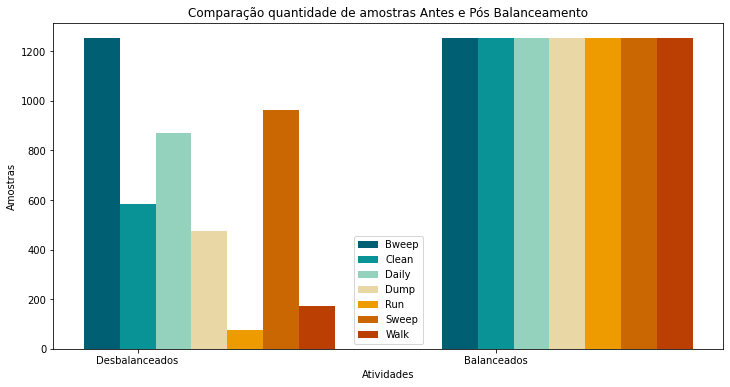

In [ ]:
#Quantidades
qtd0 = [len(df_trat[df_trat["label"] == 0]), len(X[Y == 0])]
qtd1 = [len(df_trat[df_trat["label"] == 1]), len(X[Y == 1])]
qtd2 = [len(df_trat[df_trat["label"] == 2]), len(X[Y == 2])]
qtd3 = [len(df_trat[df_trat["label"] == 3]), len(X[Y == 3])]
qtd4 = [len(df_trat[df_trat["label"] == 4]), len(X[Y == 4])]
qtd5 = [len(df_trat[df_trat["label"] == 5]), len(X[Y == 5])]
qtd6 = [len(df_trat[df_trat["label"] == 6]), len(X[Y == 6])]

# Tamanho das barras
barWidth = 0.1

# Tamanho da figura
plt.figure(figsize=(12,6))

# Posição das barras
r0 = np.arange(len(qtd0))
r1 = [x + barWidth for x in r0]
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]

# Criando as barras
plt.bar(r0, qtd0, color="#005f73", width=barWidth, label="Bweep")
plt.bar(r1, qtd1, color="#0a9396", width=barWidth, label="Clean")
plt.bar(r2, qtd2, color="#94d2bd", width=barWidth, label="Daily")
plt.bar(r3, qtd3, color="#e9d8a6", width=barWidth, label="Dump")
plt.bar(r4, qtd4, color="#ee9b00", width=barWidth, label="Run")
plt.bar(r5, qtd5, color="#ca6702", width=barWidth, label="Sweep")
plt.bar(r6, qtd6, color="#bb3e03", width=barWidth, label="Walk")

# Adicionando legenda as barras
plt.xlabel('Atividades')
plt.xticks([r + barWidth for r in range(len(qtd0))], ['Desbalanceados', 'Balanceados'])
plt.ylabel('Amostras')
plt.title('Comparação quantidade de amostras Antes e Pós Balanceamento')

# Legenda e exibindo o gráfico
plt.legend()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    Y, 
    test_size=0.3,
    random_state=10
)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Random Forest

In [ ]:
Rf = RandomForestClassifier(n_estimators = 200)

In [ ]:
Rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
prediction = Rf.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(y_test, prediction))

Accuracy: 0.9365501519756839


In [ ]:
f1_score(
    y_test, 
    prediction, 
    average='weighted'
) 

0.9360790933249747

In [ ]:
labels = df_trat["label"].unique()

In [ ]:
labelsName.sort()
labels.sort()

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       387
           1       0.90      0.94      0.92       383
           2       0.93      0.91      0.92       384
           3       0.91      0.95      0.93       374
           4       0.98      0.98      0.98       364
           5       0.93      0.96      0.94       361
           6       0.98      0.99      0.98       379

    accuracy                           0.94      2632
   macro avg       0.94      0.94      0.94      2632
weighted avg       0.94      0.94      0.94      2632

Confusion matrix, without normalization
[[321  22   8  19   0  14   3]
 [  4 360   8   4   4   3   0]
 [  9   9 350   5   2   6   3]
 [  3   4   7 354   0   4   2]
 [  0   5   0   1 357   0   1]
 [  5   2   1   6   0 347   0]
 [  1   0   2   0   0   0 376]]


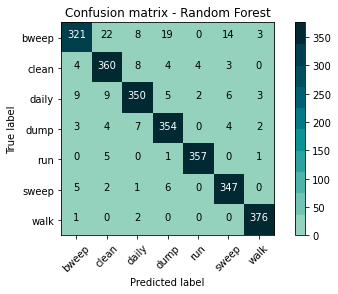

In [ ]:
cnf_matrix = confusion_matrix(
    y_test, 
    prediction, 
    labels=labels.tolist())

np.set_printoptions(precision=2)

print(classification_report(y_test, prediction))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(
    cnf_matrix, 
    classes=labelsName.tolist(),
    normalize= False,  
    title='Confusion matrix - Random Forest')

In [ ]:
# validação cruzada
num_folds = 5
scores = cross_val_score(Rf, X_train, y_train, cv = num_folds)

In [ ]:
scores

array([0.94, 0.93, 0.94, 0.91, 0.92])

In [ ]:
for v in scores:
  print(v)

0.9356677524429967
0.9324104234527687
0.9364820846905537
0.9136807817589576
0.9233903830480847


In [ ]:
stdevCross = scores.std()
stdevCross

0.00867119706814122

### Avaliação de mudança de atividade

#### Probabilidade única

In [ ]:
copyX_test = X_test
copyY_test = y_test

In [ ]:
# tempo de execução médio do código: 5 minutos
# accuracys = []
# FPs = []
# FNs = []
trues = []
predictions = []
# for i in np.arange(0.1, 1, 0.1):
# labels = [0, 1, 2, 3, 4, 5, 6]
labels = df_trat["label"].unique().tolist()

TP = 0
TN = 0
FP = 0
FN = 0

numbers = []

newYtest = []

formerLabel = 0
formerPrediction = 0

lock = 0

initialRandomLabel = random.choice(labels) # Label aleatória inicial

positionsInitialCopyYTest = np.where(copyY_test == initialRandomLabel) # Todas as posições em que a label inicial aparece
positionsCurrentCopyYTest = positionsInitialCopyYTest

initialPositionLabel = copyY_test[random.choice(positionsInitialCopyYTest[0])] # Posição aleatória em que a label inicial aparece, essa posição tambem valera para a primeira amostra
currentRandomLabel = initialRandomLabel # label atual, no inicio da analise a label inicial é a label atual 

positionsLabelsHistoric = []


initialPrediction = Rf.predict(copyX_test[initialPositionLabel].reshape(1, -1)) # predição da linha inicial da analise
currentPrediction = initialPrediction

positionsLabelsHistoric.append(initialPositionLabel)


# loop da analise que ira iterar cada amostra do conjunto de amostras
random.seed(random.randint(1, 100000))
while True:
  if (FP + TP + TN + FN) == len(copyX_test) * 10:
    break
  else:
    randomNumber = random.random()
    numbers.append(randomNumber)

    # Analisando nova amostra da mesma atividade 
    if randomNumber >= 0.005:
      NewPositionSameLabel()

      if positions == []:
        RFnewPredictionSameLabel()
      else:
        newPositionLabel = random.choice(positions)
        positionsLabelsHistoric.append(newPositionLabel)

        formerPrediction = currentPrediction

        currentPrediction = Rf.predict(copyX_test[newPositionLabel].reshape(1, -1))
        if currentPrediction == formerPrediction:
          TP = TP + 1
          trues.append(formerPrediction[0])
          predictions.append(currentPrediction[0])
          newYtest.append(0)
        else:
          FN = FN + 1
          trues.append(formerPrediction[0])
          predictions.append(currentPrediction[0])
          newYtest.append(0)

    # Analise de uma nova amostra de atividade diferente
    if randomNumber < 0.005:
      # armazenando a antiga label e removendo a mesma temporariamente do array de labels
      formerLabel = currentRandomLabel
      labels.remove(formerLabel)

      # Randomizando uma nova label
      currentRandomLabel = random.choice(labels)
      # NDArray com as posições da nova label e randomização da posição aleatoria
      positionsCurrentCopyYTest = np.where(copyY_test == currentRandomLabel)

      NewPositionSameLabel()

      if positions == []:
        RFnewPredictionNewLabel()
      else:
        newPositionLabel = random.choice(positions)
        positionsLabelsHistoric.append(newPositionLabel)

        formerPrediction = currentPrediction

        currentPrediction = Rf.predict(copyX_test[newPositionLabel].reshape(1, -1))
        if currentPrediction == formerPrediction:
          FP = FP + 1
          trues.append(formerPrediction[0])
          predictions.append(currentPrediction[0])
          newYtest.append(1)
        else:
          TN = TN + 1
          trues.append(formerPrediction[0])
          predictions.append(currentPrediction[0])
          newYtest.append(1)

        # devolvendo a label antiga ao array de labels
        labels.append(formerLabel)

print(FP)
print(FN)
print(TP)
print(TN)

accuracy = (TP + TN)/(TP + TN + FP + FN)
# accuracys.append(accuracy)
# FPs.append(FP)
# FNs.append(FN)


3
2969
23210
138


In [ ]:
accuracy

0.8870820668693009

In [ ]:
labels = df_trat["label"].unique()
labels.sort()

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      3418
           1       0.83      0.83      0.83      3376
           2       0.83      0.83      0.83      3150
           3       0.85      0.85      0.85      3408
           4       0.97      0.97      0.97      4354
           5       0.88      0.88      0.88      3454
           6       0.97      0.97      0.97      5160

    accuracy                           0.88     26320
   macro avg       0.87      0.87      0.87     26320
weighted avg       0.88      0.88      0.88     26320

Confusion matrix, without normalization
[[2661  198  134  193    4  187   41]
 [ 197 2809  129   88   95   52    6]
 [ 131  135 2620  104   23   71   66]
 [ 195   83  100 2885   14  101   30]
 [   7   93   25   15 4202    2   10]
 [ 185   49   76   94    5 3037    8]
 [  42    9   66   29   11    4 4999]]


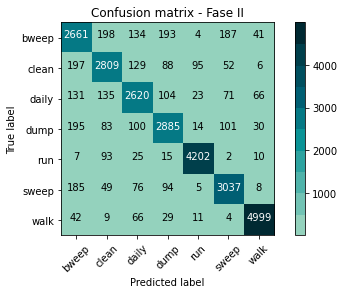

In [ ]:
cnf_matrix = confusion_matrix(trues, predictions, labels=labels.tolist())
np.set_printoptions(precision=2)

print (classification_report(trues, predictions))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=labelsName.tolist(),normalize= False,  title='Confusion matrix - Fase II')

In [ ]:
f1_score(trues, predictions, average='weighted')

0.881952887537994

# KNN

## Teste do algoritmo

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# treinando o modelo
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# predição dos valores do conjunto de teste
y_pred = knn.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred))
# print("Precision Test:",metrics.precision_score(y_test,y_pred))
# print("Recall Test:",metrics.recall_score(y_test,y_pred))

Accuracy: 0.9232522796352584


In [ ]:
f1_score(y_test, y_pred, average='weighted') 

0.922676958571045

In [ ]:
labels = df_trat["label"].unique()

In [ ]:
labelsName.sort()
labels.sort()

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       387
           1       0.91      0.91      0.91       383
           2       0.93      0.88      0.90       384
           3       0.91      0.92      0.92       374
           4       0.97      0.99      0.98       364
           5       0.91      0.95      0.93       361
           6       0.96      0.99      0.97       379

    accuracy                           0.92      2632
   macro avg       0.92      0.92      0.92      2632
weighted avg       0.92      0.92      0.92      2632

Confusion matrix, without normalization
[[321  17  10  17   3  15   4]
 [ 12 348  11   5   5   1   1]
 [ 14  10 337   5   3   9   6]
 [ 13   4   3 345   0   8   1]
 [  0   1   0   1 361   0   1]
 [  6   1   1   7   0 343   3]
 [  1   1   2   0   0   0 375]]


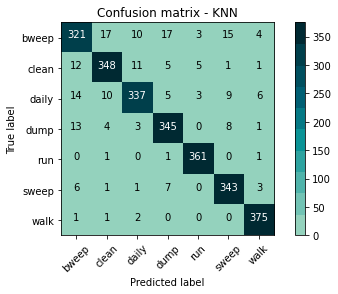

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=labels.tolist())
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=labelsName.tolist(),normalize= False,  title='Confusion matrix - KNN')

In [ ]:
accuracys = []

# Calculating error for K values between 1 and 10
for i in range(1, 11):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    accuracys.append(accuracy_score(y_test, pred_i))

In [ ]:
accuracys

[0.9361702127659575,
 0.9297112462006079,
 0.9232522796352584,
 0.9224924012158054,
 0.915273556231003,
 0.9194528875379939,
 0.9107142857142857,
 0.90919452887538,
 0.9031155015197568,
 0.9046352583586627]

In [ ]:
accuracys = [accuracys[2], accuracys[4], accuracys[6]]

In [ ]:
accuracys

[0.9232522796352584, 0.915273556231003, 0.9107142857142857]

Text(0, 0.5, 'Accuracy')

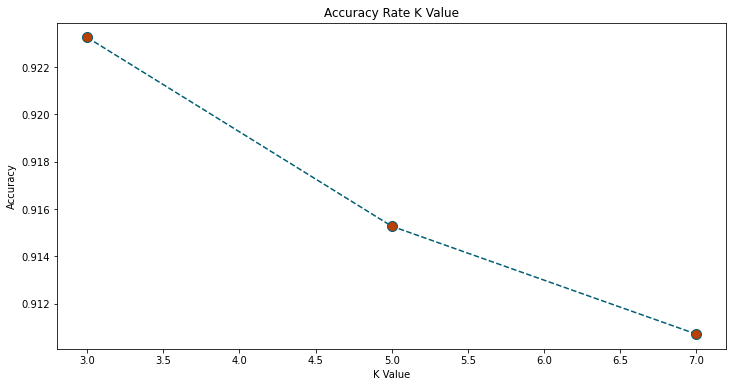

In [ ]:
plt.figure(figsize=(12, 6))  
plt.plot([3, 5, 7], accuracys, color='#005f73', linestyle='dashed', marker='o',  
         markerfacecolor='#bb3e03', markersize=10)
plt.title('Accuracy Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy')

In [ ]:
# validação cruzada
num_folds = 5
scores = cross_val_score(knn, X_train, y_train, cv = num_folds)

In [ ]:
scores

array([0.9 , 0.9 , 0.9 , 0.89, 0.88])

In [ ]:
for v in scores:
  print(v)

0.8965798045602605
0.8990228013029316
0.9030944625407166
0.8925081433224755
0.8818255908720456


In [ ]:
stdevCross = scores.std()
stdevCross

0.007255313838633488

## Avaliação mudança de atividade

1. Escolher uma amostra de um tipo de atividade qualquer e rodar a avaliação do algoritmo.

2. Sortear um numero com probabilidade de 10% para um numero e 90% para outra, caso caia nos 10% escolher uma outra amostra de uma atividade diferente, do contrário escolher outra amostra com a mesma atividade.

3. Rodar a avaliação do algoritmo.

4. Repetir os passos com o restante das amostras.

5. Ao final, analizar as métricas.

> Sequencia de uma atividade - > 0.995 (99,5%)

- Algoritmo identificar como atividade diferente (mudança de atividade para o algoritmo) marcar como FN
- Algoritmo identificar como mesma atividade (não mudança de atividade para o algoritmo) marcar como TP

> Mudança de atividade - <= 0.005 (0,5%)

- Algoritmo identificar como atividade diferente (mudança de atividade para o algoritmo) marcar como TN
- Algoritmo identificar como mesma atividade (não mudança de atividade para o algoritmo) marcar como FP


In [ ]:
copyX_test = X_test
copyY_test = y_test

In [ ]:
len(X_test)

2632

### 1. Probabilidade única

In [ ]:
# tempo de execução médio do código: 5 minutos
# accuracys = []
# FPs = []
# FNs = []
trues = []
predictions = []
# for i in np.arange(0.1, 1, 0.1):
# labels = [0, 1, 2, 3, 4, 5, 6]
labels = df_trat["label"].unique().tolist()

TP = 0
TN = 0
FP = 0
FN = 0

numbers = []

newYtest = []

formerLabel = 0
formerPrediction = 0

lock = 0

initialRandomLabel = random.choice(labels) # Label aleatória inicial

positionsInitialCopyYTest = np.where(copyY_test == initialRandomLabel) # Todas as posições em que a label inicial aparece
positionsCurrentCopyYTest = positionsInitialCopyYTest

initialPositionLabel = copyY_test[random.choice(positionsInitialCopyYTest[0])] # Posição aleatória em que a label inicial aparece, essa posição tambem valera para a primeira amostra
currentRandomLabel = initialRandomLabel # label atual, no inicio da analise a label inicial é a label atual 

positionsLabelsHistoric = []


initialPrediction = knn.predict(copyX_test[initialPositionLabel].reshape(1, -1)) # predição da linha inicial da analise
currentPrediction = initialPrediction

positionsLabelsHistoric.append(initialPositionLabel)


# loop da analise que ira iterar cada amostra do conjunto de amostras
random.seed(random.randint(1, 100000))
while True:
  if (FP + TP + TN + FN) == len(copyX_test) * 10:
    break
  else:
    randomNumber = random.random()
    numbers.append(randomNumber)

    # Analisando nova amostra da mesma atividade 
    if randomNumber >= 0.005:
      NewPositionSameLabel()

      if positions == []:
        newPredictionSameLabel()
      else:
        newPositionLabel = random.choice(positions)
        positionsLabelsHistoric.append(newPositionLabel)

        formerPrediction = currentPrediction

        currentPrediction = knn.predict(copyX_test[newPositionLabel].reshape(1, -1))
        if currentPrediction == formerPrediction:
          TP = TP + 1
          trues.append(formerPrediction[0])
          predictions.append(currentPrediction[0])
          newYtest.append(0)
        else:
          FN = FN + 1
          trues.append(formerPrediction[0])
          predictions.append(currentPrediction[0])
          newYtest.append(0)

    # Analise de uma nova amostra de atividade diferente
    if randomNumber < 0.005:
      # armazenando a antiga label e removendo a mesma temporariamente do array de labels
      formerLabel = currentRandomLabel
      labels.remove(formerLabel)

      # Randomizando uma nova label
      currentRandomLabel = random.choice(labels)
      # NDArray com as posições da nova label e randomização da posição aleatoria
      positionsCurrentCopyYTest = np.where(copyY_test == currentRandomLabel)

      NewPositionSameLabel()

      if positions == []:
        newPredictionNewLabel()
      else:
        newPositionLabel = random.choice(positions)
        positionsLabelsHistoric.append(newPositionLabel)

        formerPrediction = currentPrediction

        currentPrediction = knn.predict(copyX_test[newPositionLabel].reshape(1, -1))
        if currentPrediction == formerPrediction:
          FP = FP + 1
          trues.append(formerPrediction[0])
          predictions.append(currentPrediction[0])
          newYtest.append(1)
        else:
          TN = TN + 1
          trues.append(formerPrediction[0])
          predictions.append(currentPrediction[0])
          newYtest.append(1)

        # devolvendo a label antiga ao array de labels
        labels.append(formerLabel)

print(FP)
print(FN)
print(TP)
print(TN)

accuracy = (TP + TN)/(TP + TN + FP + FN)
# accuracys.append(accuracy)
# FPs.append(FP)
# FNs.append(FN)


4
4374
21800
142


In [ ]:
accuracy

0.8336626139817629

In [ ]:
labels = df_trat["label"].unique()
labels.sort()

              precision    recall  f1-score   support

           0       0.67      0.67      0.67      2625
           1       0.80      0.80      0.80      4304
           2       0.82      0.82      0.82      4580
           3       0.73      0.73      0.73      2746
           4       0.94      0.94      0.94      4964
           5       0.84      0.84      0.84      3683
           6       0.91      0.91      0.91      3418

    accuracy                           0.83     26320
   macro avg       0.81      0.81      0.81     26320
weighted avg       0.83      0.83      0.83     26320

Confusion matrix, without normalization
[[1746  254  183  200   16  193   33]
 [ 239 3443  243  190   96   66   27]
 [ 177  249 3740  121   66  110  117]
 [ 217  180  121 1996   64  136   32]
 [  17   94   60   67 4681    6   39]
 [ 191   56  116  140    4 3102   74]
 [  38   27  117   32   37   71 3096]]


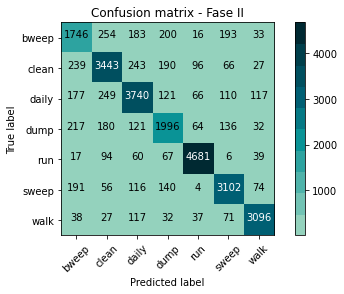

In [ ]:
cnf_matrix = confusion_matrix(trues, predictions, labels=labels.tolist())
np.set_printoptions(precision=2)

print (classification_report(trues, predictions))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=labelsName.tolist(),normalize= False,  title='Confusion matrix - Fase II')

In [ ]:
f1_score(trues, predictions, average='weighted')

0.8284186533555035

### 2. Variação das probabilidades

In [ ]:
copyX_test = X_test
copyY_test = y_test

In [ ]:
# tempo de execução médio do código: 5 minutos
accuracys = []
FPs = []
FNs = []

for i in np.arange(0.1, 1, 0.1):
  labels = df_trat["label"].unique().tolist()

  TP = 0
  TN = 0
  FP = 0
  FN = 0

  newYtest = []

  formerLabel = 0
  formerPrediction = 0

  lock = 0

  initialRandomLabel = random.choice(labels) # Label aleatória inicial

  positionsInitialCopyYTest = np.where(copyY_test == initialRandomLabel) # Todas as posições em que a label inicial aparece
  positionsCurrentCopyYTest = positionsInitialCopyYTest

  initialPositionLabel = copyY_test[random.choice(positionsInitialCopyYTest[0])] # Posição aleatória em que a label inicial aparece, essa posição tambem valera para a primeira amostra
  currentRandomLabel = initialRandomLabel # label atual, no inicio da analise a label inicial é a label atual 

  positionsLabelsHistoric = []


  initialPrediction = knn.predict(copyX_test[initialPositionLabel].reshape(1, -1)) # predição da linha inicial da analise
  currentPrediction = initialPrediction

  positionsLabelsHistoric.append(initialPositionLabel)

  random.seed(random.randint(1, 10000))
  # loop da analise que ira iterar cada amostra do conjunto de amostras
  while True:
    if (FP + TP + TN + FN) == len(copyX_test):
      break
    else:
      randomNumber = random.random()

      # Analisando nova amostra da mesma atividade 
      if randomNumber > i:
        NewPositionSameLabel()

        if positions == []:
          newPredictionSameLabel()
        else:
          newPositionLabel = random.choice(positions)
          positionsLabelsHistoric.append(newPositionLabel)

          formerPrediction = currentPrediction

          currentPrediction = knn.predict(copyX_test[newPositionLabel].reshape(1, -1))
          if currentPrediction == formerPrediction:
            TP = TP + 1
            trues.append(formerPrediction[0])
            predictions.append(currentPrediction[0])
            newYtest.append(0)
          else:
            FN = FN + 1
            trues.append(formerPrediction[0])
            predictions.append(currentPrediction[0])
            newYtest.append(0)

      # Analise de uma nova amostra de atividade diferente
      if randomNumber < i:
        # armazenando a antiga label e removendo a mesma temporariamente do array de labels
        formerLabel = currentRandomLabel
        labels.remove(formerLabel)

        # Randomizando uma nova label
        currentRandomLabel = random.choice(labels)
        # NDArray com as posições da nova label e randomização da posição aleatoria
        positionsCurrentCopyYTest = np.where(copyY_test == currentRandomLabel)

        NewPositionSameLabel()

        if positions == []:
          newPredictionNewLabel()
        else:
          newPositionLabel = random.choice(positions)
          positionsLabelsHistoric.append(newPositionLabel)

          formerPrediction = currentPrediction

          currentPrediction = knn.predict(copyX_test[newPositionLabel].reshape(1, -1))
          if currentPrediction == formerPrediction:
            FP = FP + 1
            trues.append(formerPrediction[0])
            predictions.append(currentPrediction[0])
            newYtest.append(1)
          else:
            TN = TN + 1
            trues.append(formerPrediction[0])
            predictions.append(currentPrediction[0])
            newYtest.append(1)

          # devolvendo a label antiga ao array de labels
          labels.append(formerLabel)

  accuracy = (TP + TN)/(TP + TN + FP + FN)
  accuracys.append(accuracy)
  FPs.append(FP)
  FNs.append(FN)

In [ ]:
accuracys

[0.8446048632218845,
 0.8419452887537994,
 0.8582826747720365,
 0.8917173252279635,
 0.9004559270516718,
 0.9137537993920972,
 0.9327507598784195,
 0.9407294832826748,
 0.9582066869300911]

Text(0, 0.5, 'FPs')

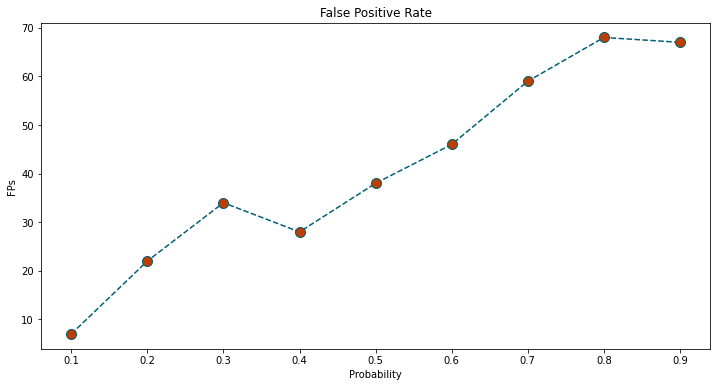

In [ ]:
plt.figure(figsize=(12, 6))  
plt.plot(np.arange(0.1, 1, 0.1), FPs, color='#005f73', linestyle='dashed', marker='o',  
         markerfacecolor='#bb3e03', markersize=10)
plt.title('False Positive Rate')  
plt.xlabel('Probability')  
plt.ylabel('FPs') 

Text(0, 0.5, 'FNs')

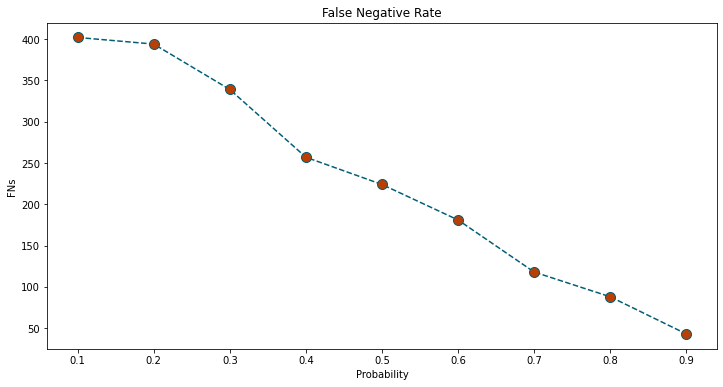

In [ ]:
plt.figure(figsize=(12, 6))  
plt.plot(np.arange(0.1, 1, 0.1), FNs, color='#005f73', linestyle='dashed', marker='o',  
         markerfacecolor='#bb3e03', markersize=10)
plt.title('False Negative Rate')  
plt.xlabel('Probability')  
plt.ylabel('FNs') 

Text(0, 0.5, 'Accuracy')

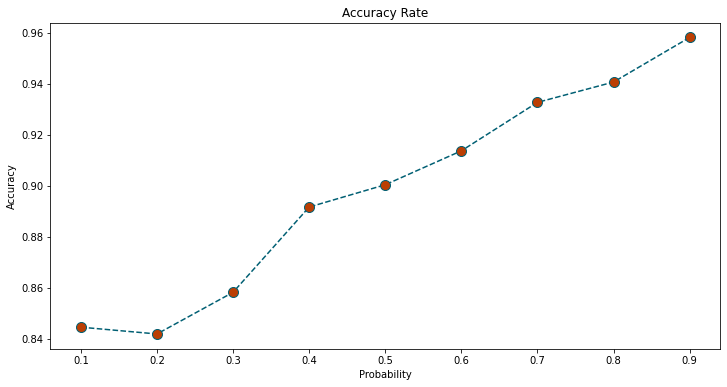

In [ ]:
plt.figure(figsize=(12, 6))  
plt.plot(np.arange(0.1, 1, 0.1), accuracys, color='#005f73', linestyle='dashed', marker='o',  
         markerfacecolor='#bb3e03', markersize=10)
plt.title('Accuracy Rate')  
plt.xlabel('Probability')  
plt.ylabel('Accuracy') 

# Regressão Logistica

In [ ]:
LR = LogisticRegression(solver='saga',multi_class='multinomial').fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
yhat = LR.predict(X_test)
yhat

array([4, 6, 2, ..., 5, 6, 6], dtype=int8)

In [ ]:
f1_score(y_test, yhat, average='weighted') 

0.685417143368313

In [ ]:
print("Accuracy Test:",accuracy_score(y_test, yhat))
#print("Precision Test:",metrics.precision_score(y_test, yhat))

Accuracy Test: 0.6968085106382979


In [ ]:
y_proba = LR.predict_proba(X_test)

In [ ]:
y_proba[0]

array([1.83e-03, 3.35e-02, 4.68e-05, 1.94e-03, 9.63e-01, 9.29e-06,
       6.43e-11])

In [ ]:
labels = df_trat["label"].unique()
labels.sort()

              precision    recall  f1-score   support

           0       0.60      0.38      0.46       387
           1       0.62      0.56      0.59       383
           2       0.67      0.60      0.64       384
           3       0.69      0.66      0.68       374
           4       0.89      0.95      0.91       364
           5       0.70      0.88      0.78       361
           6       0.67      0.88      0.76       379

    accuracy                           0.70      2632
   macro avg       0.69      0.70      0.69      2632
weighted avg       0.69      0.70      0.69      2632

Confusion matrix, without normalization
[[146  51  37  25   3  93  32]
 [ 24 216  38  67   5  17  16]
 [ 31  45 232   6  13   3  54]
 [ 21  28  14 247   0  23  41]
 [  0   2   6   0 344   0  12]
 [ 18   5   0  10   0 317  11]
 [  2   3  17   1  23   1 332]]


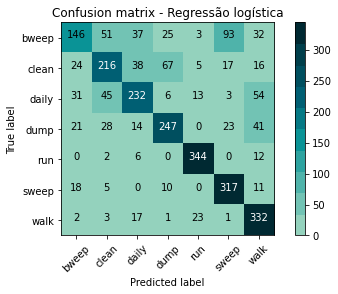

In [ ]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=labels.tolist())
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=labelsName.tolist(),normalize= False,  title='Confusion matrix - Regressão logística')

In [ ]:
num_folds = 5
scores = cross_val_score(LR, X_train, y_train, cv = num_folds)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
scores

array([0.69, 0.69, 0.72, 0.69, 0.7 ])

In [ ]:
for v in scores:
  print(v)

0.6946254071661238
0.6913680781758957
0.7166123778501629
0.6872964169381107
0.7017114914425427


In [ ]:
stdevCross = scores.std()
stdevCross

0.010291859700420371

#SVM

In [ ]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [ ]:
yhat = clf.predict(X_test)
yhat 

array([4, 6, 1, ..., 5, 6, 6], dtype=int8)

In [ ]:
f1_score(y_test, yhat, average='weighted') 

0.8790118348106122

In [ ]:
print("Accuracy:",accuracy_score(y_test, yhat))

Accuracy: 0.881079027355623


              precision    recall  f1-score   support

           0       0.88      0.70      0.78       387
           1       0.90      0.90      0.90       383
           2       0.90      0.86      0.88       384
           3       0.88      0.83      0.85       374
           4       0.95      0.98      0.96       364
           5       0.86      0.95      0.90       361
           6       0.81      0.97      0.88       379

    accuracy                           0.88      2632
   macro avg       0.88      0.88      0.88      2632
weighted avg       0.88      0.88      0.88      2632

Confusion matrix, without normalization
[[269  22  11  23   0  31  31]
 [  9 345   4  10   7   7   1]
 [ 11  11 331   5   7   3  16]
 [  8   3   9 309   4  13  28]
 [  0   2   0   1 355   0   6]
 [  8   0   2   5   0 342   4]
 [  0   0   9   0   1   1 368]]


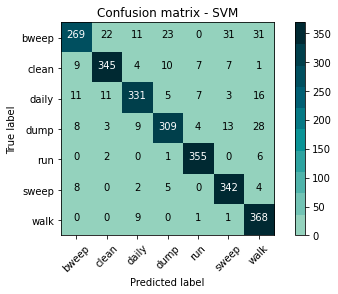

In [ ]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=labels.tolist())
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=labelsName.tolist(),normalize= False,  title='Confusion matrix - SVM')

In [ ]:
num_folds = 5
scores = cross_val_score(clf, X_train, y_train, cv = num_folds)

In [ ]:
scores

array([0.88, 0.89, 0.88, 0.86, 0.87])

In [ ]:
for v in scores:
  print(v)

0.8778501628664495
0.8941368078175895
0.8843648208469055
0.8640065146579805
0.8679706601466992


In [ ]:
stdevCross = scores.std()
stdevCross

0.010924987700958188

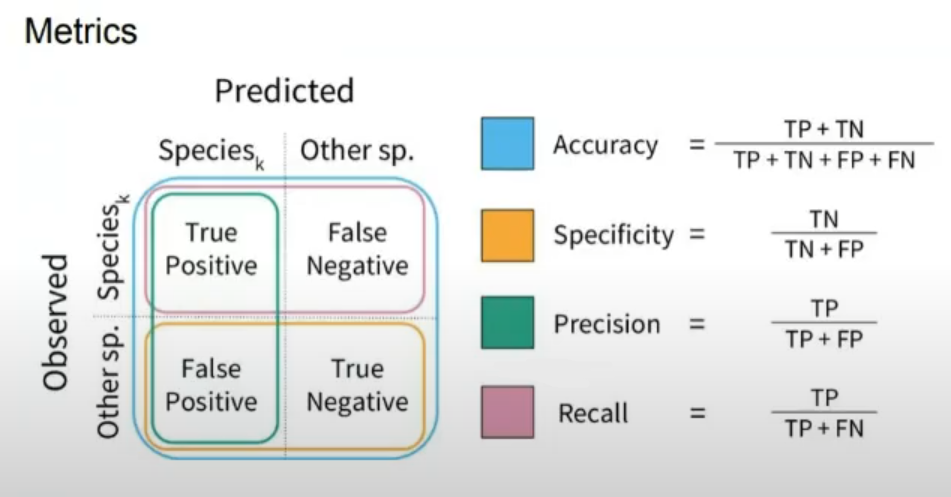